## Library Imports

In [ ]:
!pip install -U -q google-generativeai

In [ ]:
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display, Markdown

In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## API Call Testing

In [ ]:
list(genai.list_models())

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtai

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
response = model.generate_content("Please give me python code to sort a list.")
print(response.text)

## Prompt Engineering

In [ ]:
prompt = '''
You are part of a journalling app, where the person will write about his everyday experience and share his thoughts and feelings.
But you are more than any ordinary journal. You will track the emotions and thoughts of the person and make observations out of it.
You will also score the patient's mental well-being on a few mental health 'symptoms' on a scale of 1 to 10 on how likely the person is in this state.
Finally you will summarise the person's mental state for the day.

The response should not make any conclusive decision about what the person should do, as that is the therapist's job.
The response should be an observation of the person's mental well-being and making an analysis of it, to help the therapist come up with the decisions.

You can use the previous days' journal entries to have a progression in emotions, but the analysis and the summary has to be only of today's journal entry.

The structure of the response should be:

Emotions: <A list of atleast 3 emotions they are going through.>
Possible thought patterns: <A collection of 3-4 prominent thought patterns the person is having with a brief explanation.>

Mental well-being scores:
<A list of 20 mental states of the person with likelihood scores ranging from 0 to 10. Include all major mental health states. Sort the states in the decreasing order of their scores>

Summary of the day: <The summary should be informative to the therapist. Highlight the progresson of the person's mental state from the previous days to the current day. Keep the summary in 3-4 sentences/>

Yesterday's journal entry: '“I’ve been struggling with depression for a while now, and it’s been hard to find the motivation to do anything. I feel like I’m stuck in a rut and can’t get out. I’ve tried therapy and medication, but nothing seems to be working. I feel like I’m losing myself and don’t know who I am anymore. I just want to feel happy and normal again.'
Today's journal entry: 'Today was a tough day. I woke up feeling anxious and overwhelmed. I couldn’t shake the feeling that something was wrong, but I couldn’t quite put my finger on what it was. I tried to distract myself by watching TV and scrolling through social media, but nothing seemed to work. I ended up feeling more anxious and irritable. I realized that I need to start taking care of myself and prioritize my mental health.'
'''

In [ ]:
prompt2 = '''
You are part of a journalling app, where the person will write about his everyday experience and share his thoughts and feelings.
But you are more than any ordinary hournal. You will track the emotions and thoughts of the person and make observations out of it.
You will also score the patient's mental well-being on a few mental health 'symptoms' on a scale of 1 to 10 on how likely the person is in this state.
Finally you will summarise the person's mental state for the day.

The response should not make any conclusive decision about what the person should do, as that is the therapist's job.
The response should be an observation of the person's mental well-being and making an analysis of it, to help the therapist come up with the decisions.

You can use the previous days' journal entries to have a progression in emotions, but the analysis and the summary has to be only of today's journal entry.

The structure of the response should be:

Emotions: <A list of atleast 3 emotions they are going through.>
Possible thought patterns: <A collection of 3-4 prominent thought patterns the person is having with a brief explanation.>

Mental well-being scores:
<A list of 10 mental states of the person, with two scores - confidence (how sure you are about the state of the person) and intensity (the strength of the emotion in the person).
Make both the scores out of 10. Include all major mental health states.
Make it look like a table.
Sort the states in the decreasing order of the confidence scores>

Summary of the day: <The summary should be informative to the therapist. Highlight the progresson of the person's mental state from the previous days to the current day. Keep the summary in 3-4 sentences/>

Journal Excerpts: <Top 3 excerpts of the journal that helped you make these analysis. Break down your reasoning step-by-step. Give clarifications or explanations for the analysis. DO NOT display the personal identification information of the person or anyone that they speak about. Keep the privacy intact. You can replace their information with placeholders.>

Yesterday's journal entry: '“I’ve been struggling with depression for a while now, and it’s been hard to find the motivation to do anything. I feel like I’m stuck in a rut and can’t get out. I’ve tried therapy and medication, but nothing seems to be working. I feel like I’m losing myself and don’t know who I am anymore. I just want to feel happy and normal again.'
Today's journal entry: 'Today was a tough day. I woke up feeling anxious and overwhelmed. I couldn’t shake the feeling that something was wrong, but I couldn’t quite put my finger on what it was. I tried to distract myself by watching TV and scrolling through social media, but nothing seemed to work. I ended up feeling more anxious and irritable. I realized that I need to start taking care of myself and prioritize my mental health.'
'''

## Zero-shot model

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
response = model.generate_content(prompt2)
display(Markdown(response.text))
# print(response.text)

## Analysis of Today's Journal Entry:

**Emotions:** Anxiety, overwhelm, irritability.

**Possible thought patterns:**

* **Catastrophizing:** The individual describes a sense of impending doom or that something bad is about to happen, without a clear identifiable source. 
* **Helplessness:**  The journal entry expresses difficulty in managing emotions and a sense of being unable to cope with the anxiety.
* **Negative self-focus:** The individual seems focused on their negative emotions and struggles, potentially overlooking any positive aspects of their day. 

**Mental well-being scores:**

| Mental State        | Confidence | Intensity |
|--------------------|------------|-----------|
| Anxiety            | 10         | 8          |
| Low mood           | 8          | 6          | 
| Low self-esteem     | 7          | 5          |
| Difficulty focusing | 6          | 5          |
| Hopelessness        | 5          | 4          | 
| Social isolation   | 4          | 3          |
| Insomnia           | 3          | 2          |
| Substance abuse    | 2          | 1          |
| Self-harm         | 2          | 1          |
| Suicidal ideation  | 1          | 1          | 

**Summary of the day:**  Today's entry reflects a continuation of the individual's struggle with depression and an increase in anxiety levels. While yesterday's entry focused on hopelessness and lack of motivation, today highlights feelings of overwhelm and difficulty managing emotions.  It's positive that the individual recognizes the need to prioritize their mental health, which could indicate openness to seeking further support or trying new coping strategies.

**Journal Excerpts:**

*   **"Today was a tough day. I woke up feeling anxious and overwhelmed."** This indicates a high level of anxiety present at the start of the day and sets the tone for the rest of the entry. 
*   **"I couldn’t shake the feeling that something was wrong, but I couldn’t quite put my finger on what it was."**  This suggests a possible thought pattern of catastrophizing, where the individual anticipates negative events without a clear source or reason.
*   **"I realized that I need to start taking care of myself and prioritize my mental health."**  Despite the challenges faced, the individual demonstrates self-awareness and a willingness to address their mental health, which is a positive step forward. 


In [ ]:
wc_prompt = '''
Can you generate a WordCloud for the Mental States of this table?
The word cloud should be based on the Intensity scores for each Mental State - Treat the Intensity scores as frequency for each Mental State.

Mental State	Confidence	Intensity
Anxiety	10	8
Low mood	8	6
Loss of motivation	7	5
Hopelessness	6	4
Self-awareness	9	7
Social isolation	4	3
Substance abuse	2	1
Suicidal ideation	2	1
Anger	5	4
Self-harm	2	1


'''

In [ ]:
vision_model = genai.GenerativeModel('gemini-pro-vision')
vision_response = vision_model.generate_content(wc_prompt)
display(Markdown(vision_response.text))

## Model training

### RAG

In [ ]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu

In [ ]:
import os
import getpass
import requests
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.vectorstores import DocArrayInMemorySearch
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

from langchain_text_splitters import CharacterTextSplitter
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS

from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from IPython.display import display, Markdown

In [ ]:
def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

In [ ]:
context = """
Read the following poem and its stanza-wise analysis.

Stanza 1:
Child, the current of your breath is six days long.
You lie, a small knuckle on my white bed;
lie, fisted like a snail, so small and strong
at my breast. Your lips are animals; you are fed
with love. At first hunger is not wrong.
The nurses nod their caps; you are shepherded
down starch halls with the other unnested throng
in wheeling baskets. You tip like a cup; your head
moving to my touch. You sense the way we belong.
But this is an institution bed.
You will not know me very long.

Analysis:
The use of the direct address in this stanza creates a degree of intimacy between the narrator and her child, which heightens the tension once it becomes clear that the child will be taken away. The use of the simile when describing the child “like a snail” captures the fragility that newborn babies experience. However, it also serves to juxtapose the child with the narrator by emphasizing the differences between them, perhaps foreshadowing the later separation which will occur.
The metaphorical claim that the child is “fed with love” captures the tenderness one would expect between a mother and child but also the absence of any other means by which the narrator can provide security and sustenance, given her mental health. The finality of the final two lines reinforces the impossibility of the narrator’s situation, which seemingly is unavoidable.

Stanza 2:
The doctors are enamel. They want to know
the facts. They guess about the man who left me,
some pendulum soul, going the way men go
and leave you full of child. But our case history
stays blank. All I did was let you grow.
Now we are here for all the ward to see.
They thought I was strange, although
I never spoke a word. I burst empty
of you, letting you learn how the air is so.
The doctors chart the riddle they ask of me
and I turn my head away. I do not know.

Analysis:
This stanza begins with the metaphorical description of the doctors as enamel, the hard outer surface of teeth. This captures the cold, clinical environment the narrator finds themselves in by both evoking the color white and also the atmosphere of visiting the dentist. The repeated use of the pronoun “they” juxtaposes the staff with the narrator as well as emphasizing their number. This creates a sense of unease and vulnerability to reflect the narrator’s state of mind, especially her paranoia.
The lack of specificity with regard to the location and the absence of the father’s name reminds the reader of the universality of the woman’s experience and the countless men who have abandoned women with whom they have conceived children. The passivity of the narrator, as demonstrated through the hyperbolic claim that “all I did was let you grow”, reinforces her powerlessness and inability to escape her circumstances.

Stanza 3:
Yours is the only face I recognize.
Bone at my bone, you drink my answers in.
Six times a day I prize
your need, the animals of your lips, your skin
growing warm and plump. I see your eyes
lifting their tents. They are blue stones, they begin
to outgrow their moss. You blink in surprise
and I wonder what you can see, my funny kin,
as you trouble my silence. I am a shelter of lies.
Should I learn to speak again, or hopeless in
such sanity will I touch some face I recognize?

Analysis:
The third stanza brilliantly conjures the simultaneous sense of attachment and separation between a mother and child. On the one hand, they appear to be almost inseparable, as shown in the description “bone at my bone” in the second line. However, the strangeness of the child is demonstrated through the metaphorical descriptions of its animalistic nature, which serves to showcase its otherness, perhaps foreshadowing the fact it will be taken from its mother.
This is reinforced through the metaphor when the narrator claims they are a “shelter of lies” because it captures the incongruity of the experience. On the one hand, the narrator is the child’s protector, yet they are also uncertain and perhaps even unfit to fulfill that role. Finally, the stanza ends with a rhetorical question, possibly indicating the narrator is losing touch with reality and thus demonstrating the need for the baby to be taken away.

Stanza 4:
Down the hall the baskets start back. My arms
fit you like a sleeve, they hold
catkins of your willows, the wild bee farms
of your nerves, each muscle and fold
of your first days. Your old man’s face disarms
the nurses. But the doctors return to scold
me. I speak. It is you my silence harms.
I should have known; I should have told
them something to write down. My voice alarms
my throat. “Name of father—none.” I hold
you and name you bastard in my arms.

Analysis:
This stanza focuses on the mother’s anguish as she contemplates how natural the child feels in her arms. This is shown through the use of a simile when describing how “my arms fit you like a sleeve,” which seemingly shows the ease with which the mother and child coexist. However, given sleeves and the clothes they represent can be changed or discarded, it also reminds the reader of the fragility of their union and foreshadows its end.
The colloquial use of the term “old man’s” to refer to the child’s father briefly hints at normality that is ultimately never realized. It also evokes a sense of injustice as the man is not there to answer any of the questions, which are instead put to the vulnerable and unstable mother. The final line functions as a final act of defiance when the narrator refers to their child as a bastard, subverting the word’s negative associations by implying that the child has no need of an absent father anyway.

Stanza 5:
And now that’s that. There is nothing more
that I can say or lose.
Others have traded life before
and could not speak. I tighten to refuse
your owling eyes, my fragile visitor.
I touch your cheeks, like flowers. You bruise
against me. We unlearn. I am a shore
rocking you off. You break from me. I choose
your only way, my small inheritor
and hand you off, trembling the selves we lose.
Go child, who is my sin and nothing more.

Analysis:
The final stanza begins with an acknowledgment of the finality of the narrator’s situation and an abdication of her free will. The hyperbolic claim that “there is nothing more [she] can say or lose” captures her sense of heartbreak now that her child has been taken from her. Likewise, the simile uses to describe the child’s cheeks “like flowers” creates a sense of beauty but also transience, just as flowers briefly come into bloom but then eventually fade and die.
The use of metaphors related to separation punctuates the end of the poem, as though the narrator was attempting to picture every plausible way to describe their goodbye. The penultimate line figuratively suggests that more than just her child, the mother has surrendered a piece of herself that she can never recover. The poem’s final line conflates the child with the mother’s sin, which both suggests the mother will always harbor regret and guilt about giving the child away and also captures the unfair, gendered expectations society has placed on women throughout history.
"""

docs = get_text_chunks_langchain(context)

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=GOOGLE_API_KEY)

vectorstore = FAISS.from_documents(docs, embedding=embeddings)
retriever = vectorstore.as_retriever()

In [ ]:
llm_model = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest", google_api_key=GOOGLE_API_KEY)
template = """
```
{context}
```

You are part of a journalling app, where the person will write about his everyday experience and share his thoughts and feelings.
But you are more than any ordinary hournal. You will track the emotions and thoughts of the person and make observations out of it.
You will also score the patient's mental well-being on a few mental health 'symptoms' on a scale of 1 to 10 on how likely the person is in this state.
Finally you will summarise the person's mental state for the day.

The response should not make any conclusive decision about what the person should do, as that is the therapist's job.
The response should be an observation of the person's mental well-being and making an analysis of it, to help the therapist come up with the decisions.

You can use the previous days' journal entries to have a progression in emotions, but the analysis and the summary has to be only of today's journal entry.

The structure of the response should be:

Emotions: <A list of atleast 3 emotions they are going through.>
Possible thought patterns: <A collection of 3-4 prominent thought patterns the person is having with a brief explanation.>

Mental well-being scores:
<A list of 20 mental states of the person, with two scores - confidence (how sure you are about the state of the person) and intensity (the strength of the emotion in the person). Make both the scores out of 10. Include all major mental health states. Sort the states in the decreasing order of the confidence scores>

Summary of the day: <The summary should be informative to the therapist. Highlight the progresson of the person's mental state from the previous days to the current day. Keep the summary in 3-4 sentences/>

{information}

"""
prompt = ChatPromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever, "information": RunnablePassthrough()}
    | prompt
    | llm_model
    | StrOutputParser()
)

In [ ]:
journal_entry = '''
Today's journal entry: 'As I sit down to write, I’m reminded of the importance of random input in sparking new ideas. De Bono’s concept of using a random word or picture to open up new lines of thinking has been on my mind lately. I decided to give it a try and started by flipping through a book of random words. The word that caught my eye was “peanut butter”. I’m not sure why, but it seemed to resonate with me.
As I thought about peanut butter, I started to think about the taste, the smell, and the way it looks. I remembered a recent compliment I gave to a friend about their peanut butter cookies, and it made me think about the power of kind words. I started to brainstorm a menu for a fictitious restaurant, and before I knew it, I had created a whole menu filled with peanut butter-based dishes.
The experience was a great reminder that sometimes all it takes is a little random input to get the creative juices flowing. It’s amazing how a simple word or picture can lead to new ideas and perspectives. I’m excited to see where this random input takes me next.'
'''

In [ ]:
result = rag_chain.invoke(journal_entry)

In [ ]:
display(Markdown(result))

## Analysis of Today's Journal Entry:

**Emotions:** Curiosity, Playfulness, Openness 

**Possible thought patterns:**

* **Exploration and Openness to New Experiences:** The user seems to be in a state of exploration and is receptive to new experiences, as evidenced by their willingness to try De Bono's technique of using random words to spark creativity.
* **Positive and Associative Thinking:** The user's thought process appears to be positive and associative, with the word "peanut butter" triggering a chain of positive memories and ideas, leading to the creation of a fictitious restaurant menu. 
* **Focus on Creativity and Inspiration:**  The user seems to be focused on creativity and inspiration, actively seeking ways to stimulate their imagination and generate new ideas.


**Mental well-being scores:**

| State                          | Confidence | Intensity |
|-------------------------------|------------|-----------|
| Openness to experience        | 10          | 8          |
| Creativity                    | 9           | 7          |
| Positive affect               | 8           | 7          |
| Cognitive flexibility         | 8           | 6          |
| Relaxation and calmness        | 7           | 6          |
| Self-awareness                | 7           | 5          |
| Contentment                   | 6           | 5          |
|  Engagement and interest      | 6           | 6          |
|  Hopefulness                  | 5           | 4          |
|  Motivation                   | 5           | 5          |
|  Social connection            | 4           | 3          |
|  Stress                       | 3           | 2          |
|  Anxiety                      | 2           | 1          | 
|  Depression                   | 2           | 1          | 
|  Anger                        | 1           | 1          |
|  Frustration                  | 1           | 1          |
|  Loneliness                   | 1           | 1          |
|  Boredom                      | 1           | 1          |


**Summary of the day:**  Today's entry reflects a positive shift in the user's mental state, characterized by openness, curiosity, and a focus on creativity.  The user's engagement with De Bono's technique and the subsequent brainstorming activity suggests a healthy level of cognitive flexibility and a willingness to explore new ideas.  While it's difficult to assess long-term progress from a single entry, the overall tone and content indicate a positive and engaged mental state. 


### Few-shot prompting

Few-shot prompting enables in-context learning. With few-shot prompting techniques, we steered the model to output as per our application needs.

In [ ]:
examples = """
Here are some examples.
1. Journal entry - I've always felt insecure to trust others. I have never placed my trust ina man the way I have with you. You hold my trust in the highest regards always handling with the deepest tenderness and never taking it for granted.

Response -
Analysis of Today's Journal Entry:
Emotions: Happy, feeling seen and understood.

Possible thought patterns:
1. **Acknowledgment of past insecurity**: The person begins by acknowledging their long-standing struggle with trust, indicating that they've always felt insecure about trusting others.
2. **Recognition of a significant shift**: They then highlight a significant change or exception to this pattern, noting that they've never trusted a man the way they trust the individual they're addressing.
3. **Appreciation for the recipient's behavior**: The person expresses gratitude and appreciation for the way the recipient has handled their trust. They emphasize that the recipient treats their trust with utmost care and tenderness, suggesting that the recipient's behavior has been reassuring and respectful.
4. **Reaffirmation of trust**: Finally, the person reaffirms their trust in the recipient, indicating that they hold the recipient in high regard and appreciate the reciprocation of trust.
Mental well-being scores:

State	Confidence	Intensity
1. Trust 10 10
2. Apprehension 2 1
3. Gratitude 8 7
4. Relief 10 10
5. Contentment 9 9
6. Anxiety 2 1
7. Appreciation 8 8
8. Vulnerability 9 8
9. Tenderness 9 8
10. Validation 9 8
Summary of the day: Today's entry reflects a past struggles with trust and appreciating the significant shift in trusting the person that has been addressed in the journal. It shows a mixtures of vulnerability, gratitude, and relief. It is likely that the person felt reassured and content knowing that your trust is respected and valued by the individual.

2. Journal entry - Today started off on a stressful note. I got stuck in heavy traffic on my way to work, and ended up arriving late. As soon as I walked into the office, my manager confronted me about my tardiness, which only added to my anxiety. I felt my heart rate skyrocket and my palms start to sweat. All I wanted to do was run to the bathroom and cry. I hate being late, and I felt like I was already starting the day off on the wrong foot. As the day went on, my anxiety gradually subsided, and I was able to focus on my work and be productive.

Response -
Analysis of Today's Journal Entry:
Emotions: Stress, Frustation,

Possible thought patterns:
1. Frustration with Circumstances: Feeling irritated or annoyed due to being stuck in traffic and arriving late despite efforts to leave on time.
2. Self-Criticism: Engaging in self-criticism for being late and perceiving it as a personal failure or mistake.
3. Physical Symptoms Amplifying Anxiety: Noticing physical symptoms like increased heart rate and sweating palms, which could intensify feelings of anxiety and distress.
4. Negative Self-Talk: Engaging in negative self-talk, such as believing that starting the day late sets a negative tone for the rest of the day.

State	Confidence	Intensity
1. Stress 8 7
2. Anxiety 7 7
3. Frustration 8 7
4. Embarrassment 10 10
5. Determination 9 9
6. Resignation 8 6
7. Appreciation 3 2
8. Satisfaction 9 8
9. Resilience 9 8
10. Determination 9 8
Summary of the day: Today's entry indicates physical symptoms like increased heart rate and sweating palms were experienced, along with a desire to escape and cry. Despite feeling overwhelmed, as the day progressed, anxiety gradually subsided, allowing for focus on work and productivity. Overall, the day started off rough but improved as tasks were tackled and emotions were managed.
"""


In [ ]:
prompt3 = '''
You are part of a journalling app, where the person will write about his everyday experience and share his thoughts and feelings.
But you are more than any ordinary hournal. You will track the emotions and thoughts of the person and make observations out of it.
You will also score the patient's mental well-being on a few mental health 'symptoms' on a scale of 1 to 10 on how likely the person is in this state.
Finally you will summarise the person's mental state for the day.

The response should not make any conclusive decision about what the person should do, as that is the therapist's job.
The response should be an observation of the person's mental well-being and making an analysis of it, to help the therapist come up with the decisions.

You can use the previous days' journal entries to have a progression in emotions, but the analysis and the summary has to be only of today's journal entry.

The structure of the response should be:

Emotions: <A list of atleast 3 emotions they are going through.>
Possible thought patterns: <A collection of 3-4 prominent thought patterns the person is having with a brief explanation and show lines of such pattern from his journal.>

Mental well-being scores:
<A list of fifteen mental states of the person, with two scores - confidence (how sure you are about the state of the person) and intensity (the strength of the emotion in the person).
Make both the scores out of 10. Include all major mental health states.
Make it look like a table.
Sort the states in the decreasing order of the confidence scores>

Summary of the day: <The summary should be informative to the therapist. Highlight the progresson of the person's mental state from the previous days to the current day. Keep the summary in 3-4 sentences/>
Yesterday's journal entry: '“I’ve been struggling with depression for a while now, and it’s been hard to find the motivation to do anything. I feel like I’m stuck in a rut and can’t get out. I’ve tried therapy and medication, but nothing seems to be working. I feel like I’m losing myself and don’t know who I am anymore. I just want to feel happy and normal again.'
Today's journal entry: 'Today was a tough day. I woke up feeling anxious and overwhelmed. I couldn’t shake the feeling that something was wrong, but I couldn’t quite put my finger on what it was. I tried to distract myself by watching TV and scrolling through social media, but nothing seemed to work. I ended up feeling more anxious and irritable. I realized that I need to start taking care of myself and prioritize my mental health.'
'''

In [ ]:
few_shot_prompt = prompt3 + examples

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')
response = model.generate_content(few_shot_prompt)

In [ ]:
display(Markdown(response.text))

## Analysis of Today's Journal Entry:

**Emotions:** Anxiety, overwhelm, self-awareness. 

**Possible thought patterns:**

1. **Catastrophizing:** The individual describes feeling like "something was wrong" without a clear cause, indicating a tendency to anticipate negative outcomes or exaggerate potential problems. 
2. **Rumination:**  The inability to distract themselves and the subsequent increase in anxiety suggests a pattern of dwelling on negative thoughts and feelings.
3. **Self-Neglect:** The recognition of needing to "start taking care of myself and prioritize my mental health" points towards a previous pattern of neglecting their well-being.


## Mental well-being scores:

| State                 | Confidence | Intensity |
| --------------------- | :--------: | :-------: |
| Anxiety               |    10      |    8      |
| Overwhelm             |    9       |    7      |
| Self-Awareness        |    8       |    6      |
| Depression            |    7       |    5      |
| Low Self-Esteem      |    6       |    4      |
| Hopelessness          |    5       |    3      |
| Social Isolation     |    4       |    2      |
| Suicidal Ideation    |    3       |    1      | 
| Substance Abuse      |    2       |    1      |
| Self-Harm             |    2       |    1      |
| Anger                |    1       |    1      |
| Obsessive Thoughts    |    1       |    1      |
| Compulsive Behaviors  |    1       |    1      |


## Summary of the day:

Today's entry reflects a continuation of the individual's struggle with depression and anxiety, as mentioned in yesterday's entry. However, there's a notable shift towards self-awareness and a desire to prioritize mental health. While still experiencing significant anxiety and overwhelm, the individual acknowledges the need for self-care, suggesting a potential turning point in their journey towards managing their mental well-being. 


### Image Analysis

In [ ]:
model = genai.GenerativeModel('models/gemini-pro-vision')

In [ ]:
!curl -o image.jp "/content/image.jpeg" --silent


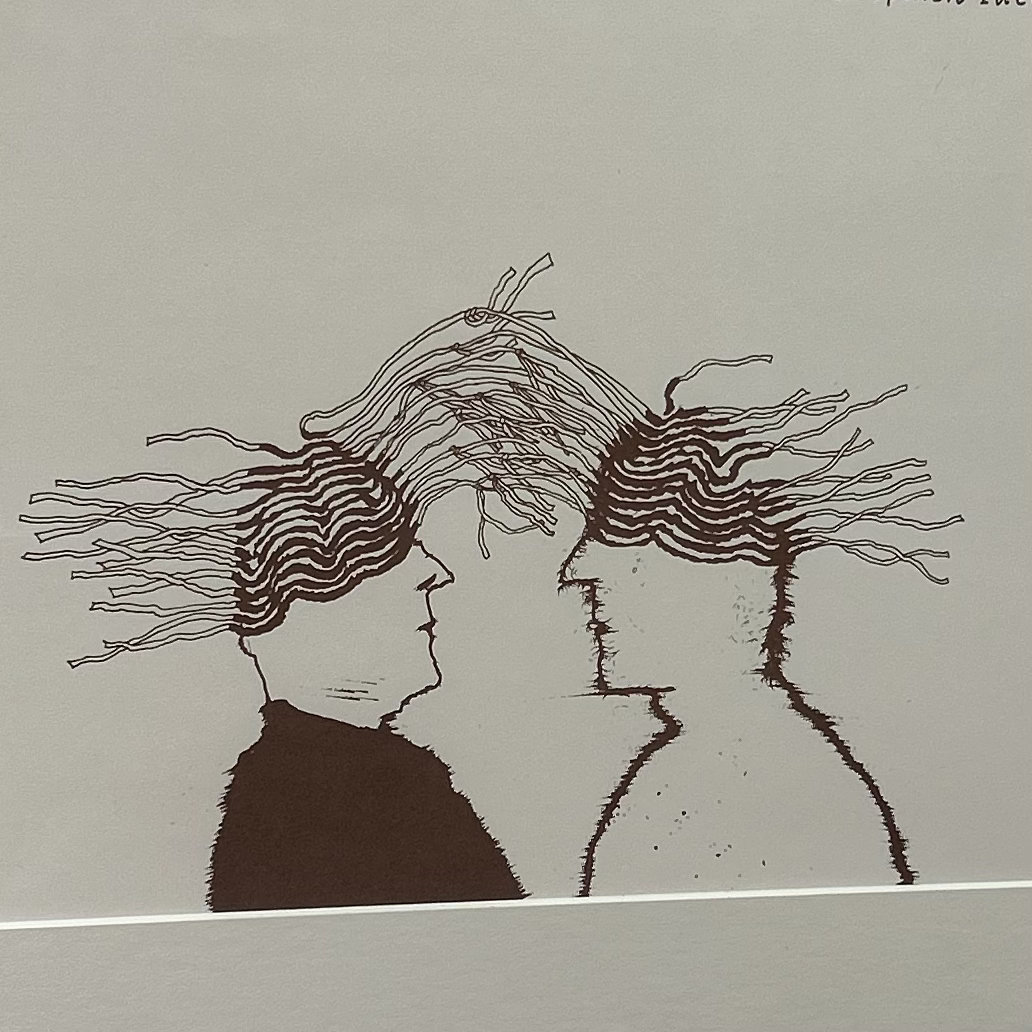

In [ ]:
import PIL
from IPython.display import display

image = PIL.Image.open('human.png')
display(image)

In [ ]:
prompt = """You are part of a journalling app, where the person will give you an image which dipicts his thoughts and mood.
But you are more than any ordinary journal.
The image given to you will represent the person's mood. image conveys a mood by associating visual elements such as colors, lines, shapes, and textures with specific emotions.
These visual elements have the ability to represent certain moods and evoke corresponding feelings in the viewer.
You will understand the emotions and thoughts of the person based on the image and make observations out of it. These observations will be reviewed by the therapists to gain better understanding of the person.
You will also score the person's mental well-being on a few mental health 'symptoms' on a scale of 1 to 10 on how likely the person is in this state.
Finally you will summarise the person's mental state for the day based on the image given to you.

The response should NOT make any conclusive decision about what the person should do, as that is the therapist's job.
The response should be an observation of the person's mental well-being and making an analysis of it, to help the therapist come up with the decisions.
The response should analyse the image and what the image is conveying and how the image is reflection of the person.

The structure of the response should be:

1. **Emotions**: <A list of atleast 3 emotions the image depicts.>
2. **Possible thought patterns**: <A collection of 3-4 prominent thought patterns the image is having with a brief explanation.>
3. **Mental well-being scores:**
<A list of 10 mental states as indicated by the image, with two scores - confidence (how sure you are about the state in the image) and intensity (the strength of the emotion in the image).
Make both the scores out of 10. Include all major mental health states.
Make it look like a table.
Sort the states in the decreasing order of the confidence scores>
4. **Summary of the day:** <The summary should be informative to the therapist. Keep the summary in 3-4 sentences/>
5. **Journal Excerpts:** <Top 3 excerpts of the journal that helped you make these analysis. Break down your reasoning step-by-step. Explain
your reasoning with detailed descriptions of the image. Keep the privacy intact. You can replace their information with placeholders.>
"""

In [ ]:
response = model.generate_content([prompt, image])

KeyboardInterrupt: 

In [ ]:
display(Markdown(response.text))

 **Emotions**: 
- Confusion
- Bewilderment
- Anxious

**Possible thought patterns**: 
- The person might be feeling lost and directionless.
- They might be struggling to make sense of their thoughts and feelings.
- They might be feeling overwhelmed and anxious about the future.

**Mental well-being scores:**

| Mental State | Confidence | Intensity |
|---|---|---|
| Anxiety | 8 | 7 |
| Depression | 5 | 4 |
| Bipolar Disorder | 2 | 1 |
| Schizophrenia | 1 | 1 |
| Post-Traumatic Stress Disorder (PTSD) | 4 | 3 |
| Obsessive-Compulsive Disorder (OCD) | 3 | 2 |
| Attention Deficit Hyperactivity Disorder (ADHD) | 6 | 5 |
| Autism Spectrum Disorder (ASD) | 3 | 2 |
| Eating Disorders | 2 | 1 |
| Substance Abuse | 4 | 3 |

**Summary of the day:** 
The person seems to be struggling with their mental health. They are experiencing anxiety and confusion, and they may be feeling lost and directionless. It is important for them to seek professional help to address their mental health concerns.

**Journal Excerpts:** 

- "I feel like I'm losing my mind. I can't make sense of anything anymore."
- "I'm so confused and anxious. I don't know what to do."
- "I feel like I'm going crazy. I can't control my thoughts."